In [228]:
import sqlalchemy as db
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Soal No 1

In [2]:
con = mysql.connector.connect(
            host ='localhost',
            user = 'root',
            passwd = 'root',
            database = 'world'
)

In [3]:
print(con)

In [9]:
c1 = con.cursor(buffered=True)
c2 = con.cursor(buffered=True)
c3 = con.cursor(buffered=True)
query1 = "select * from country"
query2 = "select * from city"
query3 = "select * from countrylanguage"

c1.execute(query1)
res1 = c1.fetchall()
country = pd.DataFrame(res1, columns= c1.column_names)

c2.execute(query2)
res2 = c2.fetchall()
city = pd.DataFrame(res2, columns= c2.column_names)


c3.execute(query3)
res3 = c3.fetchall()
countrylanguage = pd.DataFrame(res3, columns= c3.column_names)


In [54]:
country.dropna(inplace=True)
city.dropna(inplace=True)
countrylanguage.dropna(inplace=True)

Menghapus nilai NaN value

In [55]:
country.head()
country.sort_values('Population').head(10)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
123,LIE,Liechtenstein,Europe,Western Europe,160.00,1806.0,32300,78.8,1119.00,1084.00,Liechtenstein,Constitutional Monarchy,Hans-Adam II,2446.0,LI
13,ATG,Antigua and Barbuda,North America,Caribbean,442.00,1981.0,68000,70.5,612.00,584.00,Antigua and Barbuda,Constitutional Monarchy,Elisabeth II,63.0,AG
58,DMA,Dominica,North America,Caribbean,751.00,1978.0,71000,73.4,256.00,243.00,Dominica,Republic,Vernon Shaw,586.0,DM
202,SYC,Seychelles,Africa,Eastern Africa,455.00,1976.0,77000,70.4,536.00,539.00,Sesel/Seychelles,Republic,France-Albert René,3206.0,SC
212,TON,Tonga,Oceania,Polynesia,650.00,1970.0,99000,67.9,146.00,170.00,Tonga,Monarchy,Taufa'ahau Tupou IV,3334.0,TO
233,WSM,Samoa,Oceania,Polynesia,2831.00,1962.0,180000,69.2,141.00,157.00,Samoa,Parlementary Monarchy,Malietoa Tanumafili II,3169.0,WS
231,VUT,Vanuatu,Oceania,Melanesia,12189.00,1980.0,190000,60.6,261.00,246.00,Vanuatu,Republic,John Bani,3537.0,VU
27,BLZ,Belize,North America,Central America,22696.00,1981.0,241000,70.9,630.00,616.00,Belize,Constitutional Monarchy,Elisabeth II,185.0,BZ
31,BRB,Barbados,North America,Caribbean,430.00,1966.0,270000,73.0,2223.00,2186.00,Barbados,Constitutional Monarchy,Elisabeth II,174.0,BB
104,ISL,Iceland,Europe,Nordic Countries,103000.00,1944.0,279000,79.4,8255.00,7474.00,Ísland,Republic,Ólafur Ragnar Grímsson,1449.0,IS


In [85]:
city.head()


,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [114]:
col = ['CountryCode', 'Population']
cit = city[col].groupby('CountryCode')
cit = cit.mean().sort_values('Population', ascending = False).head(10)
cit.rename(columns={'Population': 'Mean'})

,Mean
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


10 Negara dengan populasi terbesar

In [191]:
acd = countrylanguage['Language'].value_counts().head(10)
acd = pd.DataFrame(acd)

acd.columns = ['count']
acd

,count
English,60
Arabic,33
Spanish,28
French,25
Chinese,19
German,19
Russian,17
Italian,15
Creole English,14
Ukrainian,12


10 Bahasa yang paling banyak digunakan di dunia

In [294]:
co = country[['Continent', 'Population']]
co = co.groupby(['Continent']).sum()
co

,Population
Continent,
Africa,740440000
Asia,3623624700
Europe,705015400
North America,477237000
Oceania,29285000
South America,345597000


In [306]:
co.iloc[0]

Population    740440000
Name: Africa, dtype: int64

# Soal No 2

C:\Users\tab\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


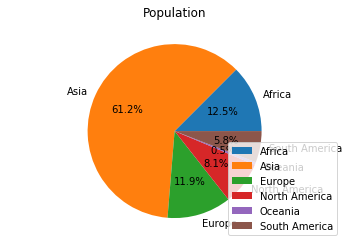

In [237]:

cont = country.groupby('Population').count()


labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania','South America']
population   = [co.iloc[0], co.iloc[1], co.iloc[2], 
         co.iloc[3], co.iloc[4], co.iloc[5]]
plt.axis("equal")
plt.pie(population, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('Population')
plt.show()

1. Persentase populasi terbanyak ada di warna orange yang ada pada benua Asia
2. Populasi yang menempati benua Amerika Utara adalah 8.1%

# Soal no 3

In [351]:
cl = country[country['Continent'] == 'Asia']
cl = cl[['Name', 'Population']]

cl = cl.sort_values('Population', ascending = False).head(10)

cl

,Name,Population
41,China,1277558000
99,India,1013662000
98,Indonesia,212107000
164,Pakistan,156483000
21,Bangladesh,129155000
109,Japan,126714000
230,Vietnam,79832000
168,Philippines,75967000
102,Iran,67702000
215,Turkey,66591000


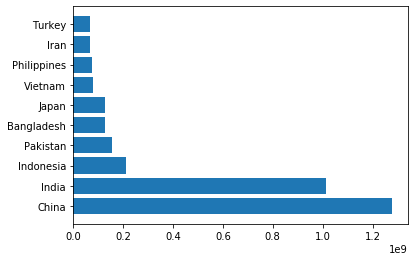

In [379]:

Negara = cl['Name'].tolist()
Populasi   = ck['Population'].tolist()

plt.barh(Negara, Populasi)


plt.show()

1. Dari barplot diatas negara dengan populasi terbanyak adalah China
2. Negara di urutan ke 10 adalah Turkey
3. Populasi negara di urutan ke 3 adalah 212107000

# Soal no 4
Hitung IQR dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia


Hitung Mean, Median, Standard Deviation, Upper Boundaries serta Lower Boundaries dari Life Expectancy.
Lakukan Skewness Test.

In [519]:
bc = country[country['Continent'] == 'Asia']
bc2 = bc['LifeExpectancy']



In [513]:
bc2.astype(float)
bc2.describe()

count       43
unique      42
top       71.8
freq         2
Name: LifeExpectancy, dtype: object

In [493]:
bc2.describe()

count       43
unique      42
top       71.8
freq         2
Name: LifeExpectancy, dtype: object

In [523]:
import math
bc3 = bc2.tolist()
def percentile(data, percentile):
    size = len(data)
    return sorted(data)[int(math.ceil((size * percentile) / 100)) - 1]

Q1 =percentile(bc3, 25)
Q2 = percentile(bc3, 75)
IQR = Q2-Q1
IQR

Decimal('10.1')

In [494]:
Mean = sum(bc2) / len(bc2.tolist())
Mean

Decimal('67.80697674418604651162790698')

In [505]:
n = len(bc2.tolist())
n_num = bc2.tolist()
bc2.tolist().sort() 
  
if n % 2 == 0: 
    median1 = n_num[n//2] 
    median2 = n_num[n//2 - 1] 
    median = (median1 + median2)/2
else: 
    median = n_num[n//2]
    
median



Decimal('53.1')

In [526]:
lower_boundary = IQR
lower_boundary

Decimal('10.1')

In [497]:
import statistics
standart_dev = statistics.pstdev(n_num)
standart_dev

Decimal('7.144762119458226835178042593')

# Soal no 5

(Poin 10) Data GNP (Gross National Product) pada Dataframe country saat ini, masih dalam satuan "million USD". Sehingga, jika Anda menemukan negara dengan GNP 10, maka value GNP sesungguhnya dari negara tersebut adalah 10,000,000 USD. Mengetahui hal itu maka, selesaikan tugas berikut:

Ubah value dalam kolom GNP (bukan GNPOld) ke nominal sesungguhnya (dikali 1,000,000)
Buatlah sebuah function bernama gnppercapita() yang berisi rumus untuk menghitung GNP per Capita. Kemudian, buatlah kolom baru bernama GNPperCapita di Dataframe country, lalu isi kolom tersebut menggunakan function yang tadi sudah dibuat.

In [462]:
country['GNP'] = country['GNP'] * 1000000
country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
2,AGO,Angola,Africa,Africa,1246700.00,1975.0,12878000,38.3,6.648000000000000000000000000E+45,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
4,ALB,Albania,Europe,Africa,28748.00,1912.0,3401200,71.6,3.205000000000000000000000000E+45,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
7,ARE,United Arab Emirates,Asia,Africa,83600.00,1971.0,2441000,74.1,3.796600000000000000000000000E+46,36846.00,Al-Imarat al-´Arabiya al-Muttahida,Emirate Federation,Zayid bin Sultan al-Nahayan,65.0,AE
8,ARG,Argentina,South America,Africa,2780400.00,1816.0,37032000,75.1,3.402380000000000000000000000E+47,323310.00,Argentina,Federal Republic,Fernando de la Rúa,69.0,AR
9,ARM,Armenia,Asia,Africa,29800.00,1991.0,3520000,66.4,1.813000000000000000000000000E+45,1627.00,Hajastan,Republic,Robert Kotšarjan,126.0,AM


In [466]:
def  gnppercapita(lst) :
    return lst['GNP']/lst['Population']
country['GNPperCapita'] =  gnppercapita(country)

country


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
2,AGO,Angola,Africa,Africa,1246700.00,1975.0,12878000,38.3,6.648000000000000000000000000E+45,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO,5.162292281410156856654760056E+38
4,ALB,Albania,Europe,Africa,28748.00,1912.0,3401200,71.6,3.205000000000000000000000000E+45,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,9.423144772433258849817711396E+38
7,ARE,United Arab Emirates,Asia,Africa,83600.00,1971.0,2441000,74.1,3.796600000000000000000000000E+46,36846.00,Al-Imarat al-´Arabiya al-Muttahida,Emirate Federation,Zayid bin Sultan al-Nahayan,65.0,AE,1.555346169602621876280213027E+40
8,ARG,Argentina,South America,Africa,2780400.00,1816.0,37032000,75.1,3.402380000000000000000000000E+47,323310.00,Argentina,Federal Republic,Fernando de la Rúa,69.0,AR,9.187675523871246489522575070E+39
9,ARM,Armenia,Asia,Africa,29800.00,1991.0,3520000,66.4,1.813000000000000000000000000E+45,1627.00,Hajastan,Republic,Robert Kotšarjan,126.0,AM,5.150568181818181818181818182E+38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,WSM,Samoa,Oceania,Africa,2831.00,1962.0,180000,69.2,1.410000000000000000000000000E+44,157.00,Samoa,Parlementary Monarchy,Malietoa Tanumafili II,3169.0,WS,7.833333333333333333333333333E+38
234,YEM,Yemen,Asia,Africa,527968.00,1918.0,18112000,59.8,6.041000000000000000000000000E+45,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,3.335357773851590106007067138E+38
236,ZAF,South Africa,Africa,Africa,1221037.00,1910.0,40377000,51.1,1.167290000000000000000000000E+47,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA,2.890977536716447482477648166E+39
237,ZMB,Zambia,Africa,Africa,752618.00,1964.0,9169000,37.2,3.377000000000000000000000000E+45,3922.00,Zambia,Republic,Frederick Chiluba,3162.0,ZM,3.683062493183553277347584251E+38


# Soal no 6

Saya memiliki asumsi bahwa negara-negara dengan 
LifeExpectancy yang tinggi akan selalu memiliki GNPperCapita yang tinggi pula. Dan ini berarti LifeExpectancy dan GNPperCapita memiliki korelasi positif yang signifikan. Apakah Anda setuju dengan asumsi saya?

Jawablah pertanyaan ini menggunakan chart/plot yang sesuai (setidaknya ada 2 chart/plot), sehingga dapat melandasi jawaban Anda!
Jika Anda setuju jelaskan alasannya, dan jika anda tidak setuju jelaskan juga alasannya!
Tampilkan dalam bentuk DataFrame benua manakah yang salah satu negaranya mencetak GNPperCapita tertinggi, jika dibandingkan dari benua-benua lainnya!

In [488]:
corr_table = country[['GNPperCapita', 'LifeExpectancy']].corr('pearson')
corr_table

""


In [490]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr_table, annot=True)

plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 720x576 with 0 Axes>